<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/K_Means_Clustering/K_Means_Clustering_with_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K Means Clustering
**Steps:**

1. Start with K centroids by putting them in random places.
2. Compute the distance of every point from the centroid and cluster them accordingly.
3. Adjust centroids so that they become the center of gravity for a given cluster.
4. Again re-cluster every point based on their distance with centroid.
5. Again adjust centroids.
6. Recompute clusters and repeat this till data points stop changing clusters.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


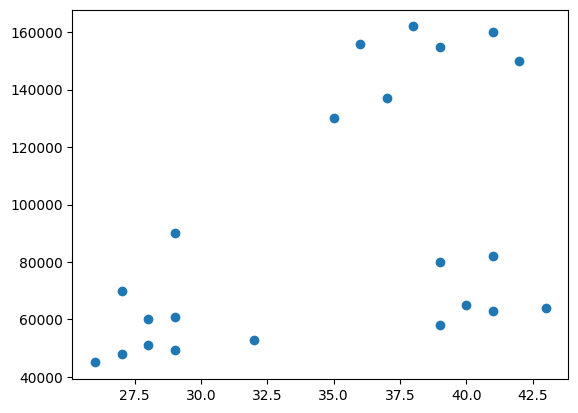

In [3]:
# Scatte Plot

plt.scatter(df['Age'], df['Income($)'])
plt.show()

# Without Scalling Value

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

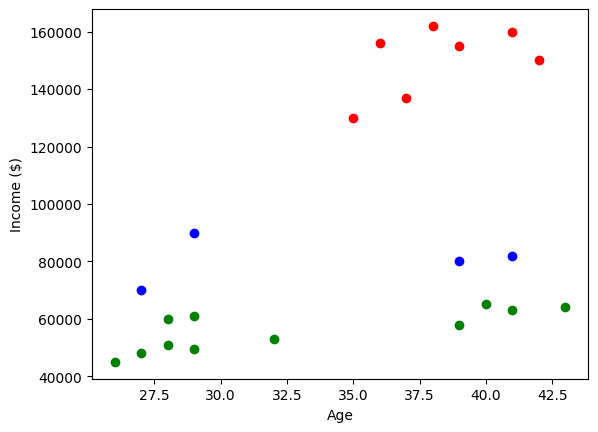

In [8]:
# Show them into scatter plot

plt.scatter(df0['Age'], df0['Income($)'], color="green")
plt.scatter(df1['Age'], df1['Income($)'], color="red")
plt.scatter(df2['Age'], df2['Income($)'], color="blue")

plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.show()

**Comment:** There is problem because of the values. They are not scaler.

# Preprocession: Scalling Value

In [9]:
scaler_age = MinMaxScaler()
scaler_age.fit(df[['Age']])
df['Age'] = scaler_age.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,70000,2
1,Michael,0.176471,90000,2
2,Mohan,0.176471,61000,0
3,Ismail,0.117647,60000,0
4,Kory,0.941176,150000,1


In [10]:
scaler_income = MinMaxScaler()
scaler_income.fit(df[['Income($)']])
df['Income($)'] = scaler_income.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [11]:
# KMeans Algorithm

km = KMeans(n_clusters= 3, n_init=10)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [12]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [13]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

In [14]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

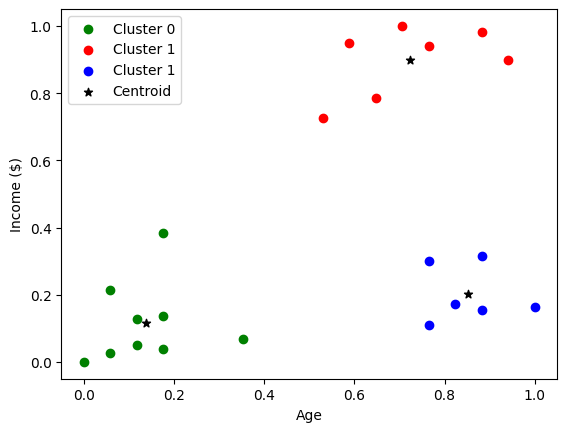

In [15]:
# Scatter Plot

plt.scatter(df0['Age'], df0['Income($)'], color="green", label="Cluster 0")
plt.scatter(df1['Age'], df1['Income($)'], color="red", label="Cluster 1")
plt.scatter(df2['Age'], df2['Income($)'], color="blue", label="Cluster 1")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="black", marker="*", label="Centroid")

plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()
plt.show()

## Find the K-N Value

In [16]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
  km = KMeans(n_clusters=k, n_init=10)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.22443334487241423,
 0.1685851223602976,
 0.1327661931978319,
 0.11190781744710707]

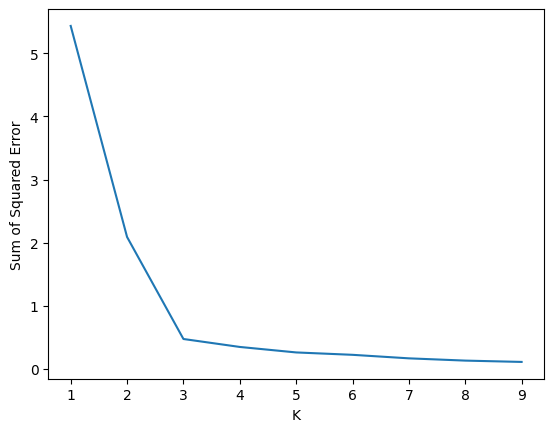

In [17]:
plt.plot(k_rng, sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.show()

**Comment:** Here, We see that 3 is the elbow point.